In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

# CMSE 381, Fundamental Data Science Methods
## Homework 2, Fall 2025

**Name:** Monis, Lowell

---

### Question 1: ISLP $\S$ 3.7.8

This question involves the use of simple linear regression on the `Auto`data set.

In [2]:
auto = pd.read_csv('../data/Auto.csv')
auto=auto.replace('?', np.nan)
auto=auto.dropna()
auto['horsepower']=auto['horsepower'].astype('int')
auto=auto.reset_index(drop=True)

#### (a) Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor.  Use the `summarize()` function to print the results. Comment on the output as guided by the below questions.

1. Is there a relationship between the predictor and the response?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. *(modified from the textbook)* What are the predicted values for the inputs? Compute the RSS and MSE using these predicted values.

I commence by creating an ordinary least squares object as the model. All imports have been completed in the file preamble and may not be visible on the final document.

In [3]:
X = sm.add_constant(auto['horsepower'])
y = auto['mpg']
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        23:03:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model summary, I can conclude that there exists a linear relationship between the predictor, i.e., `horsepower`, and the response, i.e., `mpg`. I can say this since the coefficient of determination, as determined by the R-squared value, is around 0.61. In other words, a little less than 61% of the variance in `mpg` is explained by `horsepower` linearly.

As for the strength of the relationship, we use the R-squared value again. Since the R-squared value is ~0.61, the relationship between the predictor and response values is moderately strong.

The coefficient associated with `horsepower` is negative, leading me to conclude that the relationship between `horsepower` and `mpg` is negative in direction.

I can find the predicted values for the inputs by using the `predict()` method in `sm.OLS()`.

In [4]:
y_pred = lin_reg.predict(X)
y_pred

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
387    26.361214
388    31.727935
389    26.676903
390    27.466127
391    26.992593
Length: 392, dtype: float64

The Residual Sum of Squares (RSS) and the Mean Squared Error (MSE) can be calculated as follows:

$$\text{RSS}=\sum_{i=0}^n (y_i-f(x_i))^2$$

$$\text{MSE}=\frac{\text{RSS}}{n}$$

`scikit-learn` provides a built-in function to calculate MSE, and the length of `X` or `y_pred` can be used to find RSS from there as the value of $n$. However, I am choosing to calculate RSS via an array's vectorization properties to skip the summation, leading to an extremely easy and intuitive calculation without further imports.

In [5]:
rss = np.sum((y-y_pred)**2)
print("RSS =",rss)
mse=rss/len(X)
print("MSE =",mse)

RSS = 9385.915871932419
MSE = 23.943662938603108


#### (b) Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

Ideally, I would use `sns.regplot()` or use simple `matplotlib.pyplot` commands. However, the instructions are clear here, and I will first define the functions according to the lab in text.

In [6]:
def abline(ax, b, m, *args, **kwargs):
    """Add a line with slope m and intercept b to ax
    Adapted from ISLP Section 3.6"""
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

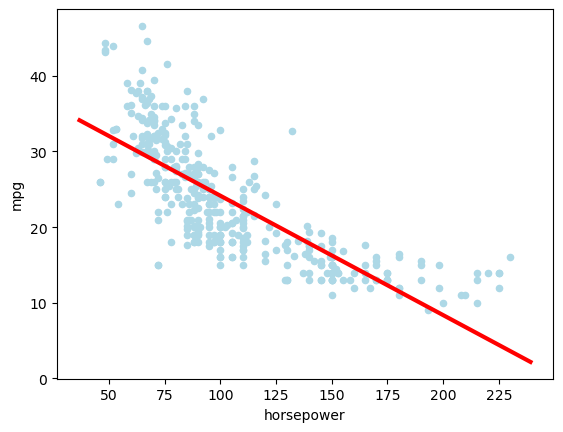

In [7]:
ax=auto.plot.scatter('horsepower', 'mpg', color='lightblue')
abline(ax,
       lin_reg.params.iloc[0],
       lin_reg.params.iloc[1],
       'r',
       linewidth=3)

### Question 2: ISLP $\S$ 3.7.13

We will not be doing part (g) in this question.

In this exercise, we will create some simulated data and fit simple linear regression models to it. Make sure to use the default random number generator with a seed set to 1 before starting part (a) to ensure consistent results.

I am defining `rng` as a function rather than a `Generator` object since each use of `rng` advances its state, thus making the `seed` definition moot. I have also decided to combine the cells for (a) and (b) to avoid potential errors since there aren't a lot of textual answers for these sub-questions. This way, the values always stay the same, without a chance for accidentally creating different values for `eps` or `x` when we need them, and I do not have to keep writing the whole code for a new `rng` repeatedly. This has also led me to create a function for the two other repetitions of this process.

In [8]:
def rng():
    return np.random.default_rng(seed=1)

#### (a) Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $\mathcal{N}(0, 1)$ distribution. This represents a feature, $X$.

#### (b) Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a $\mathcal{N}(0, 0.25)$ distribution--a normal distribution with mean zero and variance 0.25.

Here, the `scale` parameter is not variance ($\sigma^2$), but standard deviation ($\sigma$). However, the notation for a normal distribution is $\mathcal{N}(\mu, \sigma^2)$. Hence, we input the square root of 0.25 to the `normal()` method's `scale` parameter.

In [9]:
def create_data(var):
    r=rng()
    x=r.normal(0,1,100)
    eps=r.normal(0,np.sqrt(var),100)
    return x, eps
x=create_data(0.25)[0]
eps=create_data(0.25)[1]

#### (c) Using `x` and `eps`, generate a vector `y` according to the given model. What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

The model is given by:

$$Y=-1+0.5X+\epsilon$$

In [10]:
y=-1+0.5*x+eps
len(y)

100

The length of the vector `y` is expected to be 100, since the model formula essentially acted as a transformation on the original vectors `x` and `eps`, which had 100 elements each. The length inquiry using the `len()` function verifies this expectation.

All ideal linear regression models follow the following general formula:

$$y = \beta_0 + \beta_1x = \epsilon$$

Here, $y$ is the response vector, while $\beta_0$ and $\beta_1$ are the coefficients. $\beta_0$ specifically is the intercept and $\beta_1$ is the slope. Upon comparison, $\beta_0=-1$ and $\beta_1=0.5$ in this linear model.

#### (d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

<Axes: >

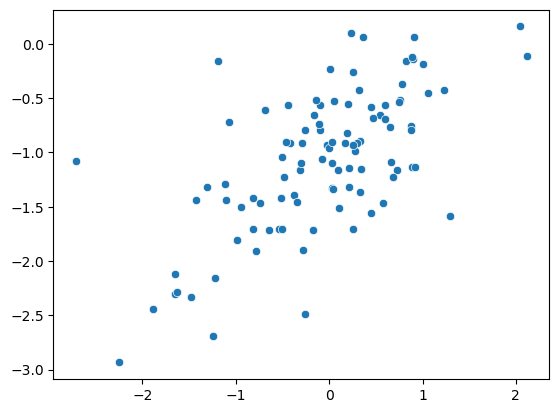

In [11]:
sns.scatterplot(x=x, y=y)

In this scatterplot, I notice a generally increasing linear relationship with a positive relationship between `x` and `y`. Although there are deviations from the general trend, I can observe that an increase in `x` leads to a near equal increase in `y`, with a few deviations from a potential line-of-best-fit (added as a result of `eps`, creating noise in the data). This noise can lead to a relatively smaller R-squared since the residuals appear to be potentially larger than expected.

#### (e)  Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [12]:
X = sm.add_constant(x)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           8.04e-13
Time:                        23:03:02   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0380      0.050    -20.647      0.000      -1.138      -0.938
x1             0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model obtained shows a positive relationship between the predictor and response. Both coefficients are statistically significant with negligible $p$-values. The R-squared value tells us that only about 41% of the variance in the data can be explained by this model, leading me to conclude that the relationship is fairly strong.

All predicted linear regression models follow the following general formula:

$$\hat y = \hat\beta_0 + \hat\beta_1x = \epsilon$$

Here, $\hat y$ is the predicted response vector, while $\hat\beta_0$ and $\hat\beta_1$ are the estimated coefficients, and not the true population coefficients/parameters like $\beta_i$. Upon comparison, $\hat\beta_0=-1.04$ and $\beta_1=0.48$ in this linear model.

The estimated coefficients $\hat\beta_i$ were close to the true values $\beta_i$.

#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

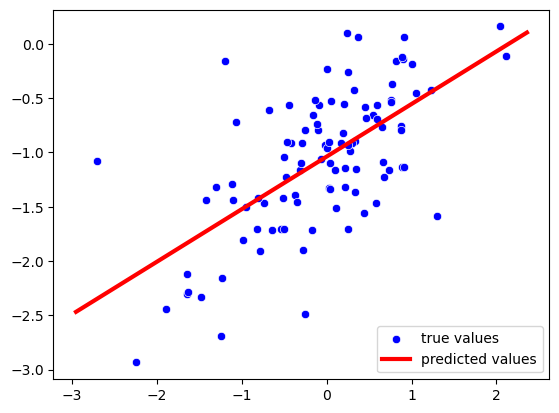

In [13]:
ax = sns.scatterplot(x=x, y=y, color='blue', label='true values')
abline(ax,
       lm.params[0],
       lm.params[1],
       'r',
       linewidth=3,
       label='predicted values')
ax.legend()

#### (h) Repeat (a)-(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

I will reuse the `create_data()` function I wrote earlier to easily replicate the process. However, I will decrease the noise in the data by decreasing the variance of the normal distribution used to generate `eps`. Thus, I will update `eps` to $\mathcal{N}(0,0.1)$, with the `scale` parameter of the `normal()` method of `rng` being $\sqrt{0.1}$.

In [14]:
x1=create_data(0.1)[0]
eps1=create_data(0.1)[1]

The model remains the same:

$$Y=-1+0.5X+\epsilon$$

Since `x1` remains the same as `x`, and the number of elements in `eps1` remains the same as earlier, the length of `y1` should remain 100. I apply the model to `y1` again with the new values.

In [15]:
y1=-1+0.5*x1+eps1
len(y1)

100

The values of $\beta_i$ remain the same as earlier, since the model was not changed. $\beta_0=-1$ and $\beta_1=0.5$ in this linear model.

<Axes: >

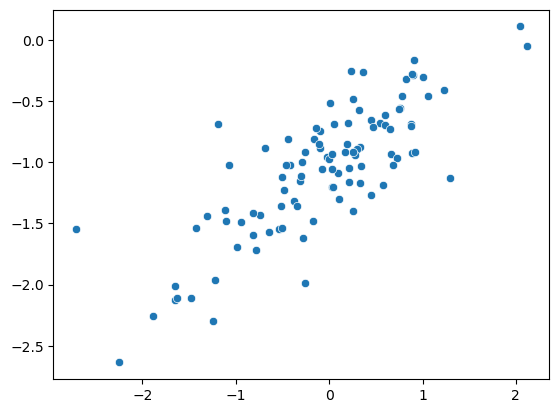

In [16]:
sns.scatterplot(x=x1, y=y1)

In this scatterplot, I notice a clearly increasing linear relationship with a positive relationship between `x1` and `y1`. Although there are deviations from the general trend, it is lesser compared to the original model. I can conclude safely that the R-squared value will be fairly higher, as the residuals appear to be substantially smaller compared to the original model.

Finally, we will proceed with creating a linear model for the data.

In [17]:
X1 = sm.add_constant(x1)
lm1 = sm.OLS(y1, X1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     173.5
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           2.05e-23
Time:                        23:03:02   Log-Likelihood:                -25.931
No. Observations:                 100   AIC:                             55.86
Df Residuals:                      98   BIC:                             61.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0240      0.032    -32.206      0.000      -1.087      -0.961
x1             0.4901      0.037     13.173      0.000       0.416       0.564
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model obtained shows a positive relationship between the predictor and response, with almost exactly a 1-unit increase in response per 2-unit increase in predictor value. Both coefficients are statistically significant with negligible $p$-values. The R-squared value tells us that nearly 64% of the variance in the data can be explained by this model, leading me to conclude that the relationship is moderately strong.

All predicted linear regression models follow the following general formula:

$$\hat y = \hat\beta_0 + \hat\beta_1x = \epsilon$$

Upon comparison, $\hat\beta_0=-1.02$ and $\beta_1=0.49$ in this linear model.

The estimated coefficients $\hat\beta_i$ are very close to the true values $\beta_i$.

We can now visualize the linear regression model by superimposing the line-of-best-fit on the true data points.

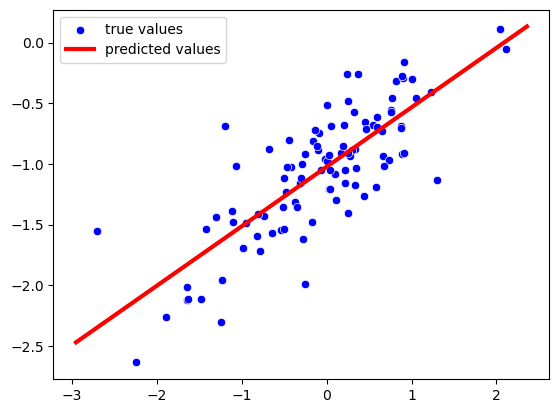

In [18]:
ax = sns.scatterplot(x=x1, y=y1, color='blue', label='true values')
abline(ax,
       lm1.params[0],
       lm1.params[1],
       'r',
       linewidth=3,
       label='predicted values')
ax.legend()

#### (i) Repeat (a)-(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

I will reuse the `create_data()` function I wrote earlier to easily replicate the process. However, I will increase the noise in the data by decreasing the variance of the normal distribution used to generate `eps`. Thus, I will update `eps` to $\mathcal{N}(0,0.4)$, with the `scale` parameter of the `normal()` method of `rng` being $\sqrt{0.4}$.

In [19]:
x2=create_data(0.4)[0]
eps2=create_data(0.4)[1]

The model remains the same:

$$Y=-1+0.5X+\epsilon$$

Since `x2` remains the same as `x`, and the number of elements in `eps2` remains the same as earlier, the length of `y2` should remain 100. I apply the model to `y2` again with the new values.

In [20]:
y2=-1+0.5*x2+eps2
len(y2)

100

The values of $\beta_i$ remain the same as earlier, since the model was not changed. $\beta_0=-1$ and $\beta_1=0.5$ in this linear model.

<Axes: >

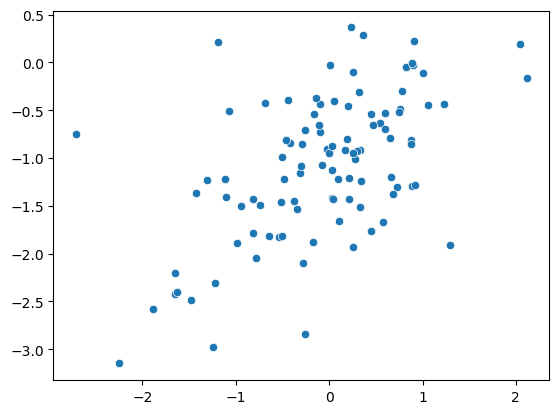

In [21]:
sns.scatterplot(x=x2, y=y2)

In this scatterplot, I notice a clearly increasing linear relationship with a positive relationship between `x2` and `y2`. There are noticeable residuals and deviations from a general trend line. I can conclude that this model will have a lower R-squared value.

Finally, we will proceed with creating a linear model for the data.

In [22]:
X2 = sm.add_constant(x2)
lm2 = sm.OLS(y2, X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     41.64
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           4.19e-09
Time:                        23:03:02   Log-Likelihood:                -95.246
No. Observations:                 100   AIC:                             194.5
Df Residuals:                      98   BIC:                             199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0481      0.064    -16.481      0.000      -1.174      -0.922
x1             0.4801      0.074      6.453      0.000       0.332       0.628
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model obtained shows a positive relationship between the predictor and response. Both coefficients are statistically significant with negligible $p$-values. The R-squared value tells us that nearly 30% of the variance in the data can be explained by this model, leading me to conclude that the relationship is fairly weak.

All predicted linear regression models follow the following general formula:

$$\hat y = \hat\beta_0 + \hat\beta_1x = \epsilon$$

Upon comparison, $\hat\beta_0=-1.05$ and $\beta_1=0.48$ in this linear model.

The estimated coefficients $\hat\beta_i$ are close to the true values $\beta_i$, but the furthest when compared precisely with the other models.

We can now visualize the linear regression model by superimposing the line-of-best-fit on the true data points.

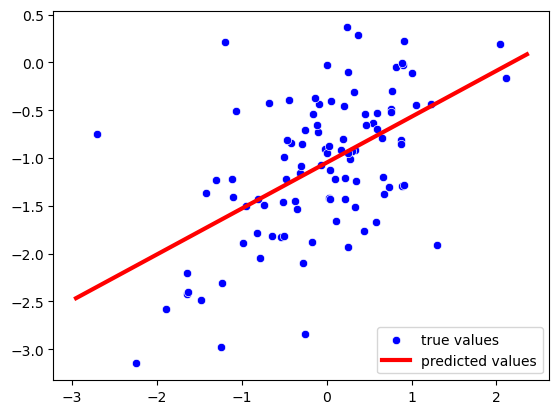

In [23]:
ax = sns.scatterplot(x=x2, y=y2, color='blue', label='true values')
abline(ax,
       lm2.params[0],
       lm2.params[1],
       'r',
       linewidth=3,
       label='predicted values')
ax.legend()

#### (j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

We can compute the confidence intervals of each of the three models using the `conf_int()` method of the OLS objects. We start with writing a function to make this easier to compute:

In [24]:
def interpretCI(model):
    print('beta_0 =',model.params[0],'is in between',model.conf_int(alpha=0.05)[0][0],'and',model.conf_int(alpha=0.05)[0][1])
    print('beta_1 =',model.params[1],'is in between',model.conf_int(alpha=0.05)[1][0],'and',model.conf_int(alpha=0.05)[1][1])

For the original data set:

In [25]:
interpretCI(lm)

beta_0 = -1.0380127774981607 is in between -1.1377819826358517 and -0.9382435723604696
beta_1 = 0.48429101457751783 is in between 0.3675653637721341 and 0.6010166653829015


There is a 95% chance that the true values of $\beta_0=-1.0$ and $\beta_1=0.5$ are within their respective confidence intervals as computed above.

$$\beta_0\in [-1.14, -0.94]$$

$$\beta_1\in [0.37, 0.60]$$

We now proceed with the less noisy data set:

In [26]:
interpretCI(lm1)

beta_0 = -1.0240413914166768 is in between -1.0871409771326122 and -0.9609418057007415
beta_1 = 0.4900647652669149 is in between 0.4162409816848188 and 0.563888548849011


There is a 95% chance that the true values of $\beta_0=-1.0$ and $\beta_1=0.5$ are within their respective confidence intervals as computed above.

$$\beta_0\in [-1.09, -0.96]$$

$$\beta_1\in [0.42, 0.56]$$

Finally, we proceed with the noisier data set:

In [27]:
interpretCI(lm2)

beta_0 = -1.0480827828333545 is in between -1.1742819542652252 and -0.9218836114014838
beta_1 = 0.48012953053382973 is in between 0.33248196336963765 and 0.6277770976980218


There is a 95% chance that the true values of $\beta_0=-1.0$ and $\beta_1=0.5$ are within their respective confidence intervals as computed above.

$$\beta_0\in [-1.17, -0.92]$$

$$\beta_1\in [0.33, 0.63]$$

Upon observation, the confidence intervals become wider with more noise.

### Question 3: ISLP $\S$ 3.7.1

#### Describe the null hypotheses to which the $p$-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these $p$-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio`, and `newspaper`, rather than in terms of the coefficients of the linear model.

| | Coefficient | Std. error | $t$-statistic | $p$-value |
| :--- | :--- | :--- | :--- | :--- |
| Intercept | 2.939 | 0.3119 | 9.42 | < 0.0001 |
| TV | 0.046 | 0.0014 | 32.81 | < 0.0001 |
| radio | 0.189 | 0.0086 | 21.89 | < 0.0001 |
| newspaper | -0.001 | 0.0059 | -0.18 | 0.8599 |

The following are the corresponding null hypotheses to the $p$-values provided for each of the predictors:
1. The null hypothesis claims that TV advertising has no effect on sales.
2. The null hypothesis claims that radio advertising has no effect on sales.
3. The null hypothesis claims that newspaper advertising has no effect on sales.
4. The null hypothesis claims that the baseline sales, i.e., when no money is spent on advertising, is zero.

The $p$-values associated with TV advertising and radio advertising are near zero. This tells me that the chance that there is no effect of TV and radio advertising on sales is also near zero, or that the probability of there being no relation between TV/radio advertising and sales is negligible. Another way to say this is that the chances of the relationship between TV/radio advertisement and sales being random is zero. Thus, there is strong evidence against the null hypothesis, leading us to reject it and accept that there is a statistically significant relationship between TV advertising and sales, as well as radio advertising and sales.

Similarly, he $p$-value associated with the baseline sales is also near zero. This tells me that the chance that no sales occur when no money is spent on advertisement is negligible. Thus, there is strong evidence against the null hypothesis and we reject it and accept that there is a statistically significant amount of sales happening when advertisement budgets are zero.

Finally, the p-value associated with newspaper advertising is 0.8599. This tells me that the chance that there is no effect of newspaper advertisement on sales is pretty high. Another way to put this is that the probability of the relationship established by the model between the newspaper advert budget and sales being random is about 86%. Thus, there is weak evidence against the null hypothesis, leading us to fail to reject it. Thus, newspaper advertisement does not appear to influence sales in a statistically significant way, and there is a possibility that the relationship is random.

### Question 4: ISLP $\S$ 3.7.9

The question involves the use of multiple linear regression on the `Auto` data set. However, for this homework, the question has been modified slightly. Using the `Auto` data set, we will predict $Y=\text{mpg}$ using all other variables except name and origin.

The sub-parts have been modified too.

#### (a) Generate the correlation matrix between all variables. Are there any pairs that are particularly highly correlated?

First, we load the data set and clean it.

In [6]:
auto = pd.read_csv('../data/Auto.csv')
auto=auto.replace('?', np.nan)
auto=auto.dropna()
auto['horsepower']=auto['horsepower'].astype('int')
auto=auto.reset_index(drop=True)
auto=auto.drop(['name', 'origin'], axis=1)

Now, we use the `DataFrame.corr()` method in `pandas` to compute the correlation matrix between all the quantitative variables.

In [8]:
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration      year  
mpg               0.423329  0.580541  
cylinders        -0.504683 -0.345647  
displacement     -0.543800 -0.369855  
horsepower       -0.689196 -0.416361  
weight           -0.416839 -0.309120  
acceleration      1.000000  0.290316  
year              0.290316  1.000000

From the matrix, I can see that the following pairs are highly correlated:

1. `mpg` and `cylinders`; -0.78
2. `mpg` and `displacement`; -0.81
3. `mpg` and `horsepower`; -0.78
4. `mpg` and `weight`; -0.83
5. `cylinders` and `displacement`; 0.95
6. `cylinders` and `horsepower`; 0.84
7. `cylinders` and `weight`; 0.90
8. `displacement` and `horsepower`; 0.90
9. `displacement` and `weight`; 0.93
10. `horsepower` and `weight`; 0.86
11. `horsepower` and `acceleration`; =0.69


#### (b) Using `statsmodels`, create a linear model predicting `mpg` from all other variables except name and origin.

In [15]:
y=auto.mpg
X=sm.add_constant(auto.drop('mpg',axis=1))
mlm=sm.OLS(y,X).fit()
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sun, 14 Sep 2025   Prob (F-statistic):          3.79e-135
Time:                        11:18:57   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
year             0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X

cylinders  displacement  horsepower  weight  acceleration  year
0            8         307.0         130    3504          12.0    70
1            8         350.0         165    3693          11.5    70
2            8         318.0         150    3436          11.0    70
3            8         304.0         150    3433          12.0    70
4            8         302.0         140    3449          10.5    70
..         ...           ...         ...     ...           ...   ...
387          4         140.0          86    2790          15.6    82
388          4          97.0          52    2130          24.6    82
389          4         135.0          84    2295          11.6    82
390          4         120.0          79    2625          18.6    82
391          4         119.0          82    2720          19.4    82

[392 rows x 6 columns]

#### (b) Look at the data used in the notebook by creating and running a new cell with just the code `college` in it.

In [29]:
college

Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 19 columns]

You should notice that the first column is just the name of each university in a column named something like `Unnamed: 0`. We don't really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames.

In [30]:
college2 = pd.read_csv('../data/College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college2

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

In [31]:
college3

Private   Apps  Accept  Enroll  Top10perc  \
College                                                                    
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                         
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
College                                                                      
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                    
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    450

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is `Private`. Note that the names of the colleges appear on the left of the table. We also introduced a new Python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with the following:

In [32]:
college = college3

#### (c) Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [33]:
college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

#### (d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

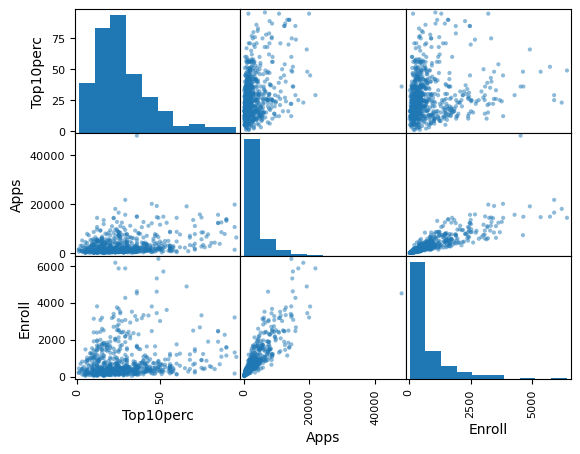

In [34]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

#### (e) Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

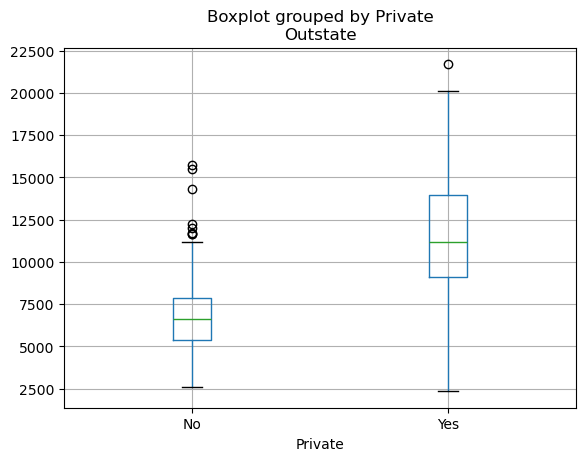

In [35]:
college.boxplot(column='Outstate', by='Private')

#### (f) Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [36]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are.

In [37]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` versus `Elite`.

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

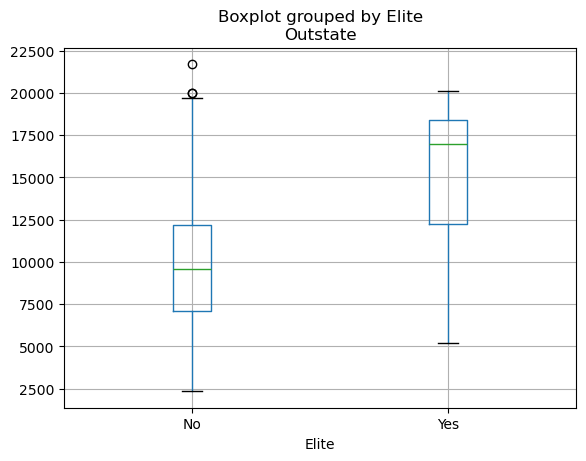

In [38]:
college.boxplot(column='Outstate', by='Elite')

#### (g) Use the `plot.hist()` method of `college` to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

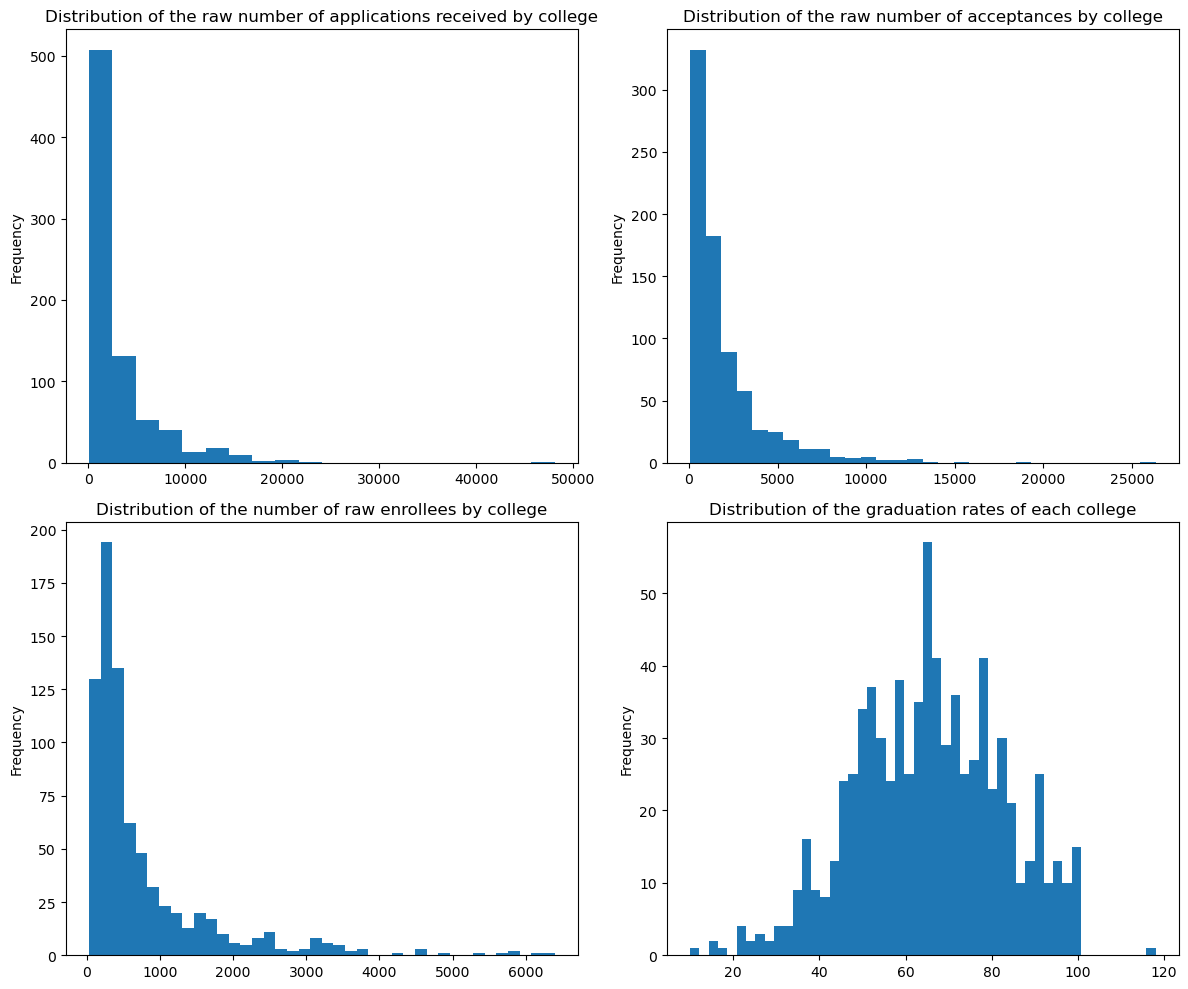

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

college['Apps'].plot.hist(ax=ax1, bins=20, title='Distribution of the raw number of applications received by college')
college['Accept'].plot.hist(ax=ax2, bins=30, title='Distribution of the raw number of acceptances by college')
college['Enroll'].plot.hist(ax=ax3, bins=40, title='Distribution of the number of raw enrollees by college')
college['Grad.Rate'].plot.hist(ax=ax4, bins=50, title='Distribution of the graduation rates of each college')

plt.tight_layout()

#### (h) Continue exploring the data and provide a brief summary of what you discover.

Text(0.5, 0.98, 'Pair Plot of College Data')

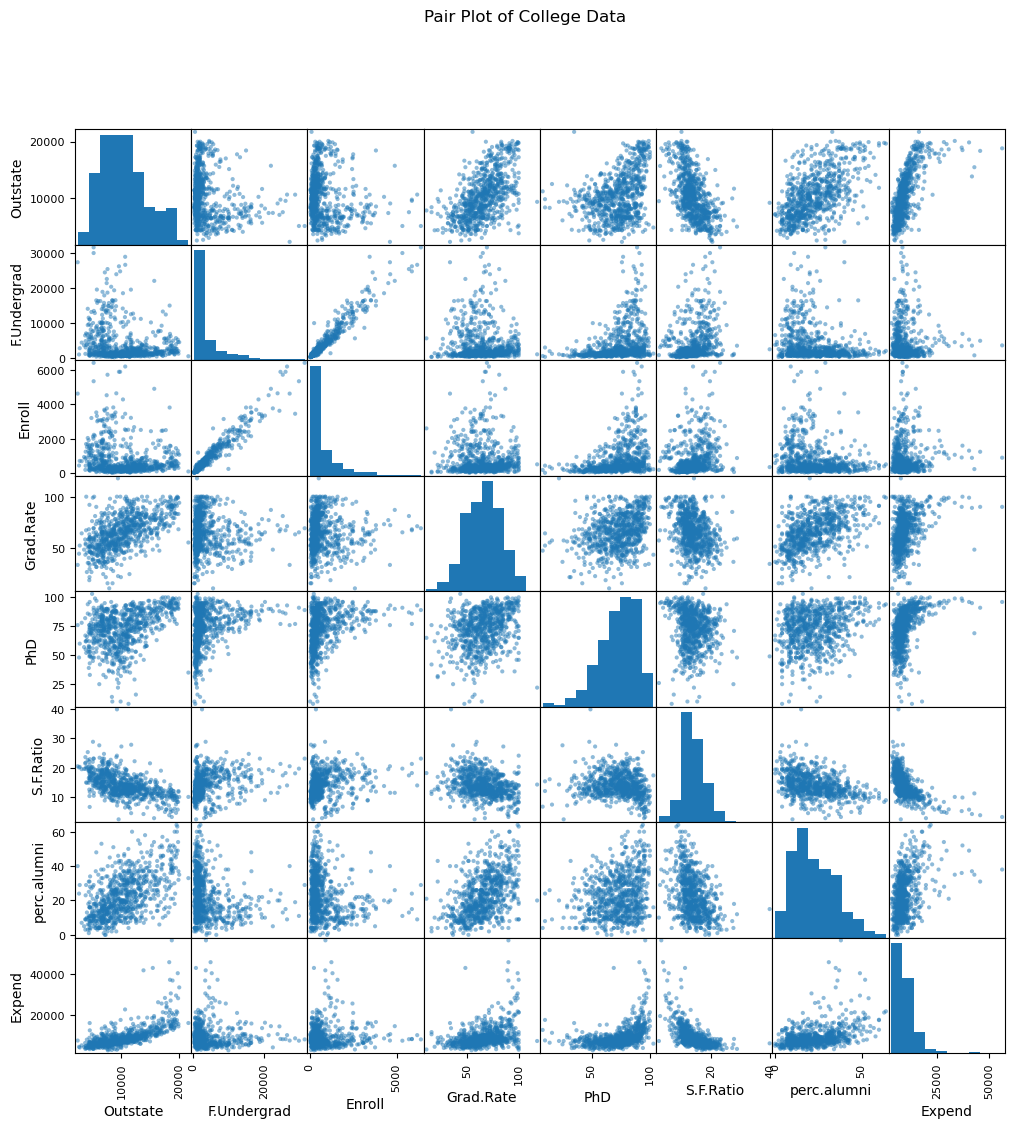

In [40]:
select = ['Outstate', 'F.Undergrad', 'Enroll', 'Grad.Rate', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Expend']
pd.plotting.scatter_matrix(college[select], figsize=(12, 12))
plt.suptitle('Pair Plot of College Data')

Text(0.5, 1.0, 'Out-of-State Tuition by Funding Model (Private or not)')

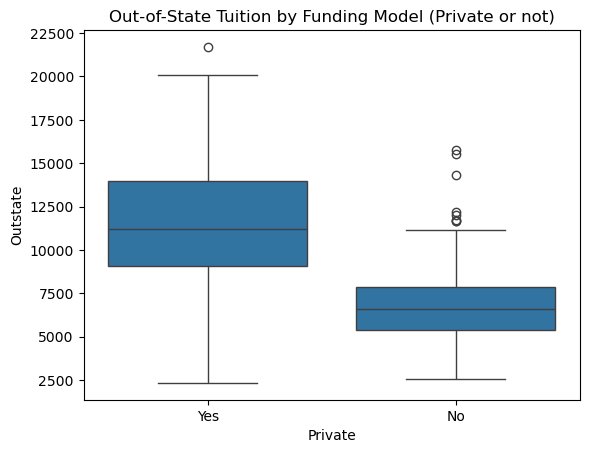

In [41]:
sns.boxplot(data=college, x='Private', y='Outstate')
plt.title('Out-of-State Tuition by Funding Model (Private or not)')

Text(0.5, 1.0, 'Student/Faculty Ratio by Funding Model (Private or not)')

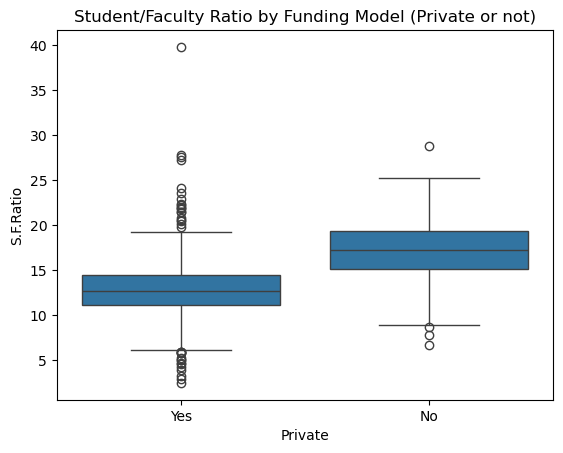

In [42]:
sns.boxplot(data=college, x='Private', y='S.F.Ratio')
plt.title('Student/Faculty Ratio by Funding Model (Private or not)')

Text(0.5, 1.0, 'Out-of-State Tuition by Elite Status of College')

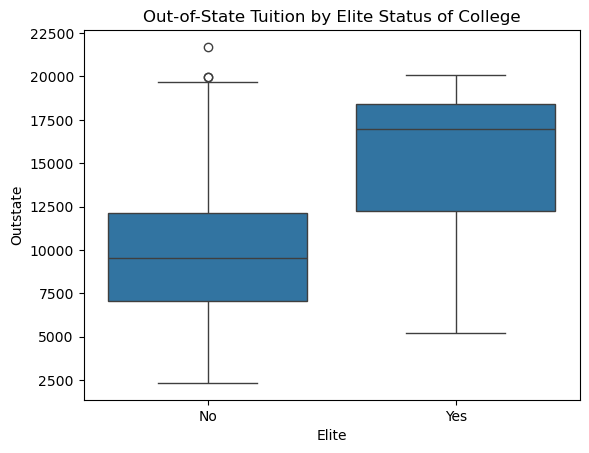

In [43]:
sns.boxplot(data=college, x='Elite', y='Outstate')
plt.title('Out-of-State Tuition by Elite Status of College')

Text(0.5, 1.0, 'Graduation Rate by Elite Status of College')

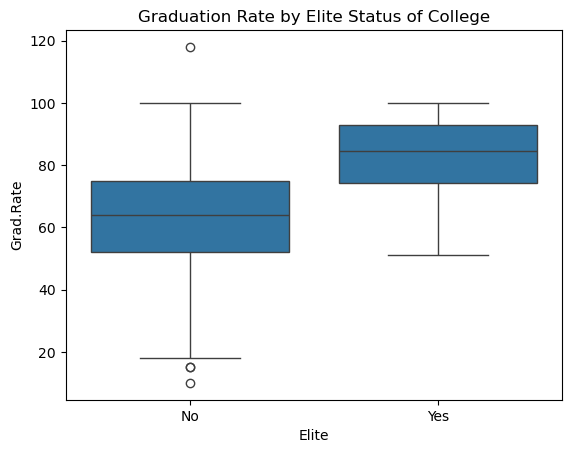

In [44]:
sns.boxplot(x='Elite', y='Grad.Rate', data=college)
plt.title('Graduation Rate by Elite Status of College')

The pair plot matrix provides a visual representation of the relationships between several key quantitative variables. There is a strong positive correlation between per-student instructional expenditure and the out-of-state tuition of colleges. Generally, universities with higher out-of-state tuition typically spend more money to teach the average student at their institution. While there is an almost linear relationship between total full-time undergraduate enrollment and enrollment for the year, this could be attributed to multicollinearity since most colleges typically have some relationship between students enrolled in a year and the total undergraduate class size. I can also observe a strong negative correlation between student/faculty ratio and out-of-state tuition, indicating that schools with fewer students per faculty member charge higher tuition for out-of-state students.

Private schools tend to have higher out-of-state tuition and lower student/faculty ratios. On the other hand "elite" colleges tend to have a higher graduation rate, and a higher out-of-state tuition.

### Collaborations and Acknowledgments

In Question 2, I used Gemini by Google to try and understand why my values for `x` kept changing every time I ran my random number generator to create a sample from a normal distribution, even though my seed was set in stone. I used the following prompt:

> "This is what I have in my Jupyter notebook:
>
> cell 1: `rng=np.random.default_rng(1)`
>
> cell 2: `x=rng.normal(0,1,100)`
>
> When I run cell 2 after running cell 1, each run of cell 2 gives me different values of x, which is weird because I have a Generator object set to a single seed. What's going wrong?

The answer I got has been mentioned and incorporated within my answer to the question as justification for why I used a function rather than an object for `rng`. I recognize the fallacies in generative artificial intelligence when it told me to combine both cells, which would technically ruin my flow while trying to answer each question sequentially with added markdown text. It also suggested that I repeat the random number generation for each cell. The logical solution would be to use a function, which the prompt answer failed to provide, even with a more advanced GPT model in the premium version of Gemini.